# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression (Best Treshold) </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

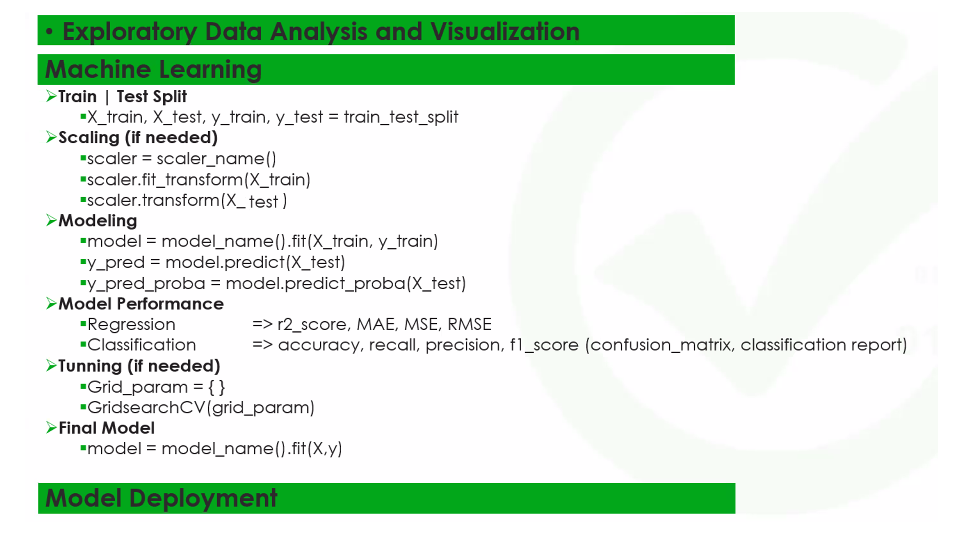

# Exploratory Data Analysis

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.options.display.float_format = '{:.3f}'.format

Bu veri seti, Arizona'da yaşayan Pima Kızılderili kadınları üzerinde yapılan diyabet çalışmalarından elde edilen verileri içerir.

Veri seti aşağıdaki özellikleri içermektedir:

   1. **Pregnancies:** Hamilelik sayısı.<br>
   2. **Glucose:** Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu.<br>
   3. **Blood Pressure:** Kan basıncı (mm Hg).<br>
   4. **Skin Thickness:** Triceps deri kıvrım kalınlığı (mm).<br>
   5. **Insulin:** 2 saatlik serum insülini (mu U/ml).<br>
   6. **BMI:** Vücut kitle indeksi (ağırlık kg/(boy m)^2).<br>
   7. **Diabetes Pedigree Function:** Diyabet soyağacı fonksiyonu, aile geçmişine dayalı diyabet olasılığını belirleyen bir fonksiyon.<br>
   8. **Age:** Yaş (yıl).<br>
   9. **Outcome:** Sınıf etiketi (0 veya 1), kişinin diyabet hastası olup olmadığını gösterir. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.<br>

Bu veri seti, makine öğrenimi algoritmalarını eğitmek ve diyabet hastalığının tahmin edilmesi gibi ikili sınıflandırma problemlerinde kullanılmak üzere yaygın bir şekilde kullanılır. Veri seti, özellikle veri önişleme, özellik mühendisliği ve sınıflandırma algoritmalarının performanslarının karşılaştırılması gibi konularda kullanılır.

Veri setinin kullanıldığı tipik uygulamalar arasında, hangi hasta profillerinin diyabet riski taşıdığını anlamak, hangi özelliklerin diyabet olasılığını artırdığını belirlemek ve diyabet teşhisinin otomatik olarak konmasına yardımcı olacak tahmin modelleri geliştirmek bulunur.

Veri setinin doğası gereği, bazı özelliklerin eksik olabileceği veya dengesiz bir sınıf dağılımına sahip olabileceği gibi zorluklar içerebileceğini unutmamak önemlidir. Bu tür zorluklar, veri temizleme, eksik veri imputasyonu, dengesiz veri setlerini ele alma ve model doğrulama teknikleri gibi makine öğrenimi konularını derinlemesine inceleme fırsatı sunar.

In [20]:
df = pd.read_csv("diabetes.csv")

In [21]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [22]:
df.shape

(768, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [25]:
# Classification problemlerinde sıklıkla karşılaşılan problemlerden biri de inbalanced datalardır.
# Sayısı az olan classın doğal olarak gözlem sayısı da az olduğundan modelin bu gözlemlerden yapabildiği öğrenme, sayısı çok olan sınıfa nazaran genellikle daha zayıf kalmakta ve ilgili classa ait scorlar daha düşük çıkabilmektedir.
# Az olan classın scorlarını düzeltmek/dengelemek için yapılabilecek işlemlerin detayına aşağıda gireceğiz.
# ÖNEMLİ NOT: inbalanced olan tüm datalarda az olan classın scorları kötü çıkmaz.
# Bazı datalarda az olan classların skorları da çok iyi çıkabilir.
# Data az olmasına rağmen classı çok iyi tanımladığından az olan veriler bile eğitim için yeterli olabilir.
# Bu durumlarda az olan classın scorlarını düzeltmeye/dengelemeye gerek yoktur.

In [26]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [27]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

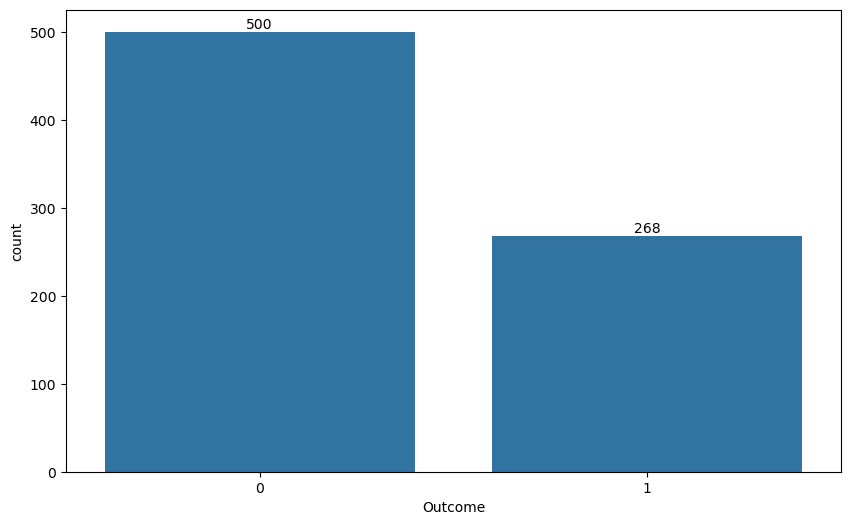

In [28]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);

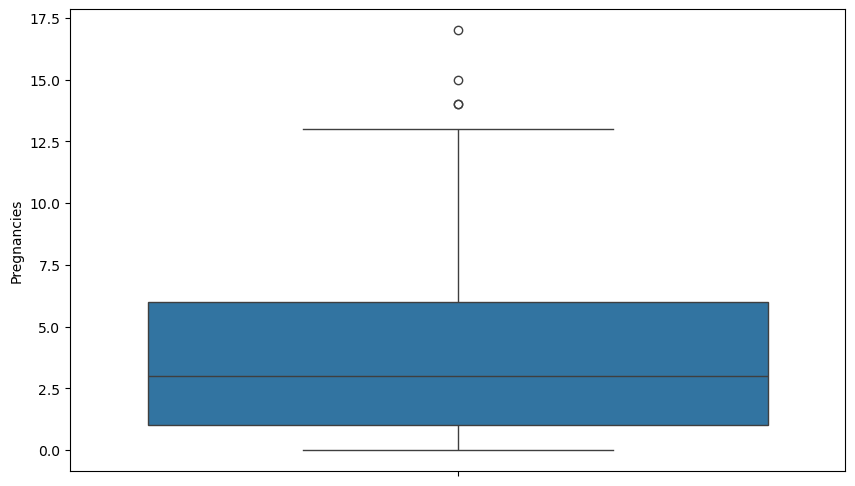

In [29]:
sns.boxplot(df.Pregnancies);

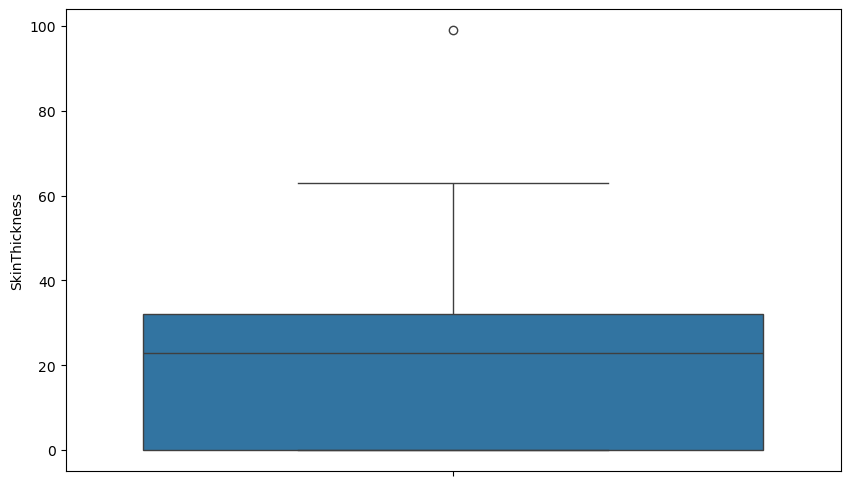

In [30]:
sns.boxplot(df.SkinThickness);

In [31]:
df = df[df.SkinThickness<70]

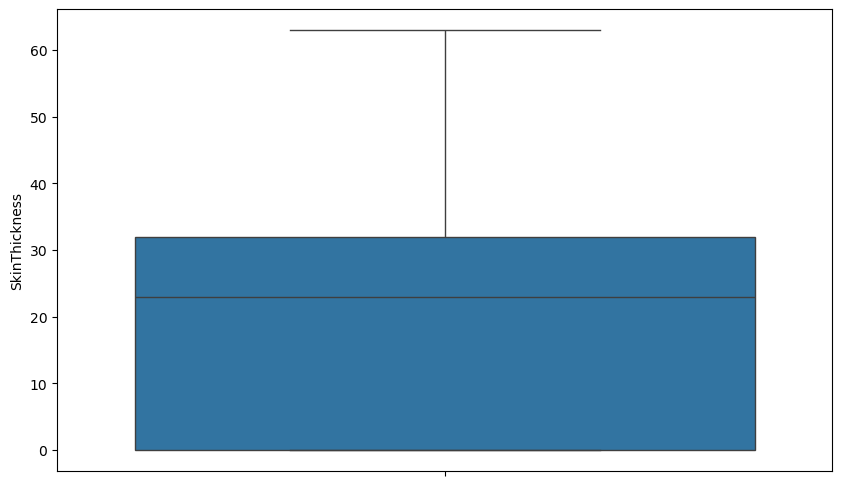

In [32]:
sns.boxplot(df.SkinThickness);

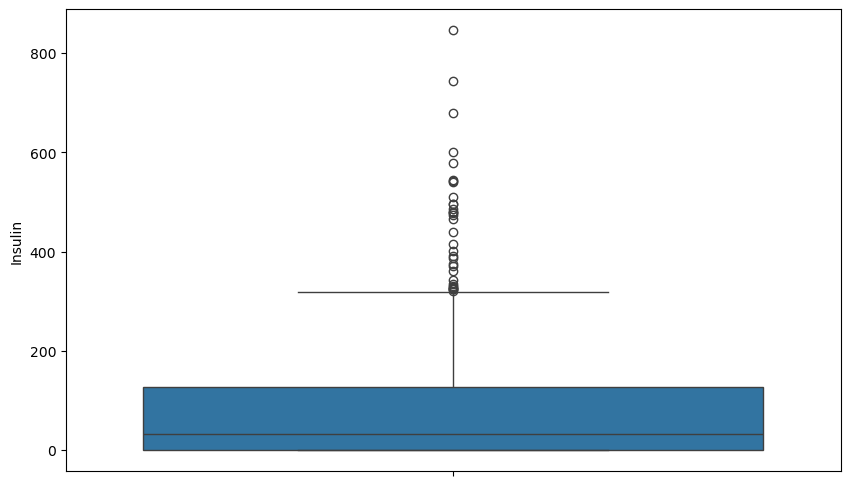

In [33]:
sns.boxplot(df.Insulin);

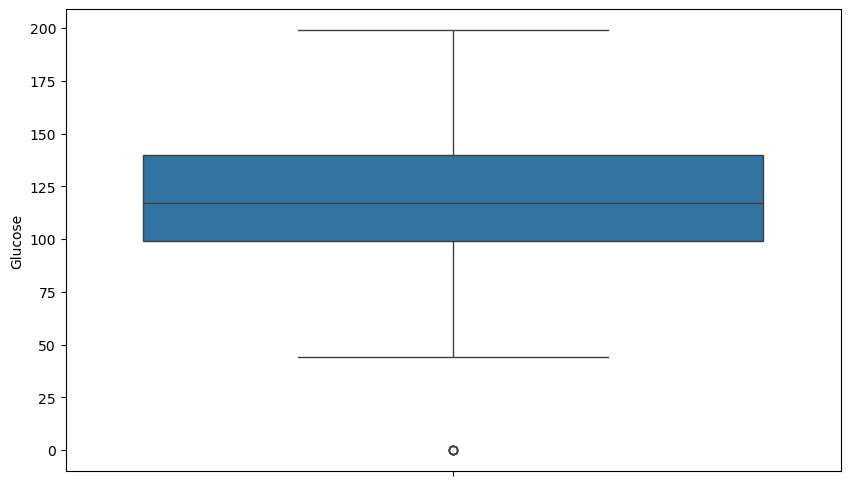

In [34]:
sns.boxplot(df.Glucose);

In [35]:
df = df[df.Glucose>0]

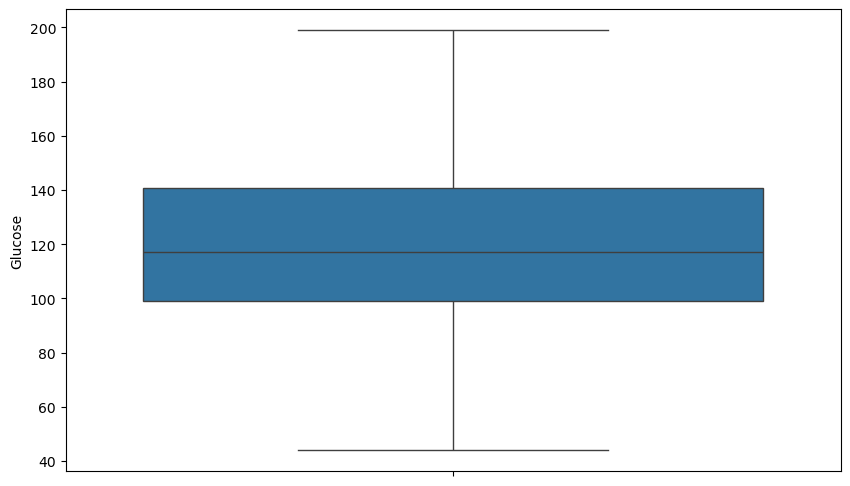

In [36]:
sns.boxplot(df.Glucose);

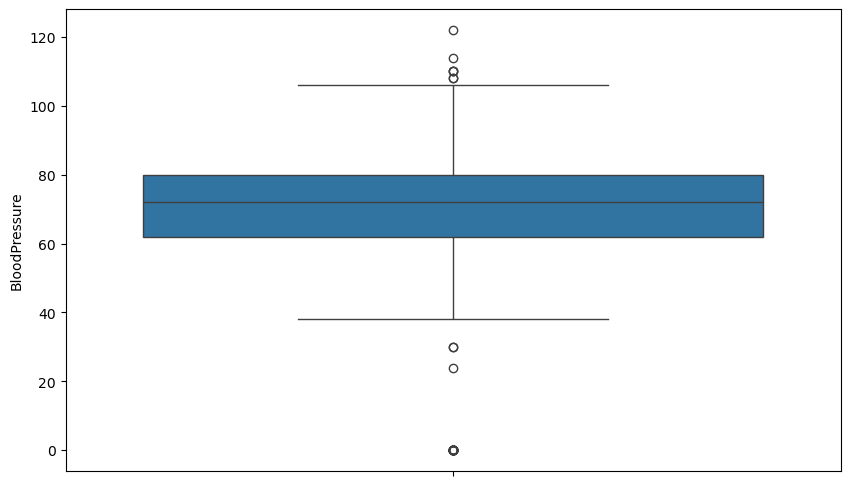

In [37]:
sns.boxplot(df.BloodPressure);

In [38]:
df = df[df.BloodPressure>35]

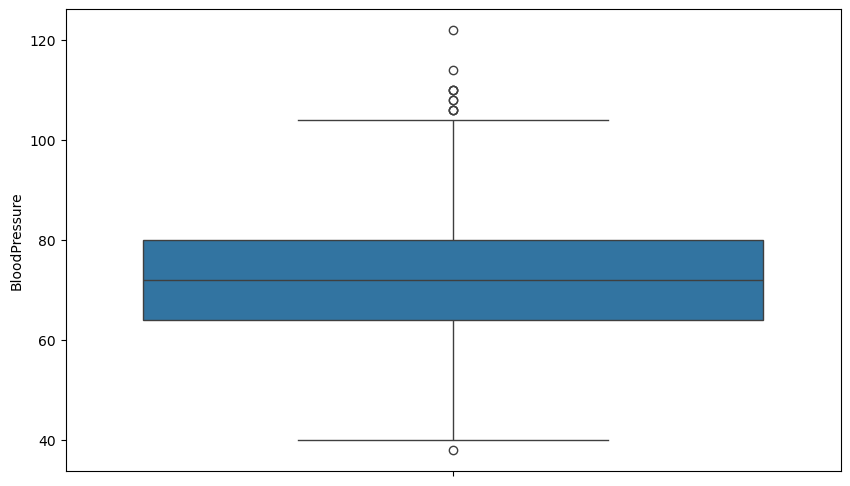

In [39]:
sns.boxplot(df.BloodPressure);

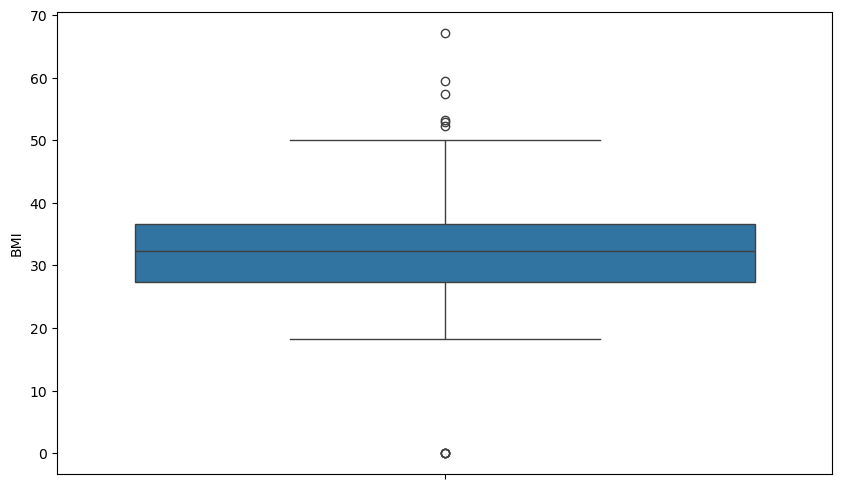

In [40]:
sns.boxplot(df.BMI);

In [41]:
df = df[df.BMI>0]

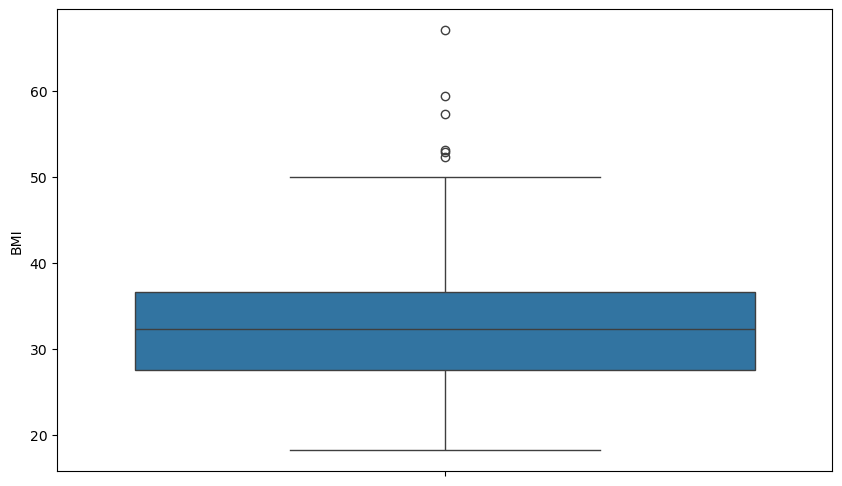

In [42]:
sns.boxplot(df.BMI);

In [43]:
df.shape  

(720, 9)

In [44]:
df.Outcome.value_counts() 

Outcome
0    473
1    247
Name: count, dtype: int64

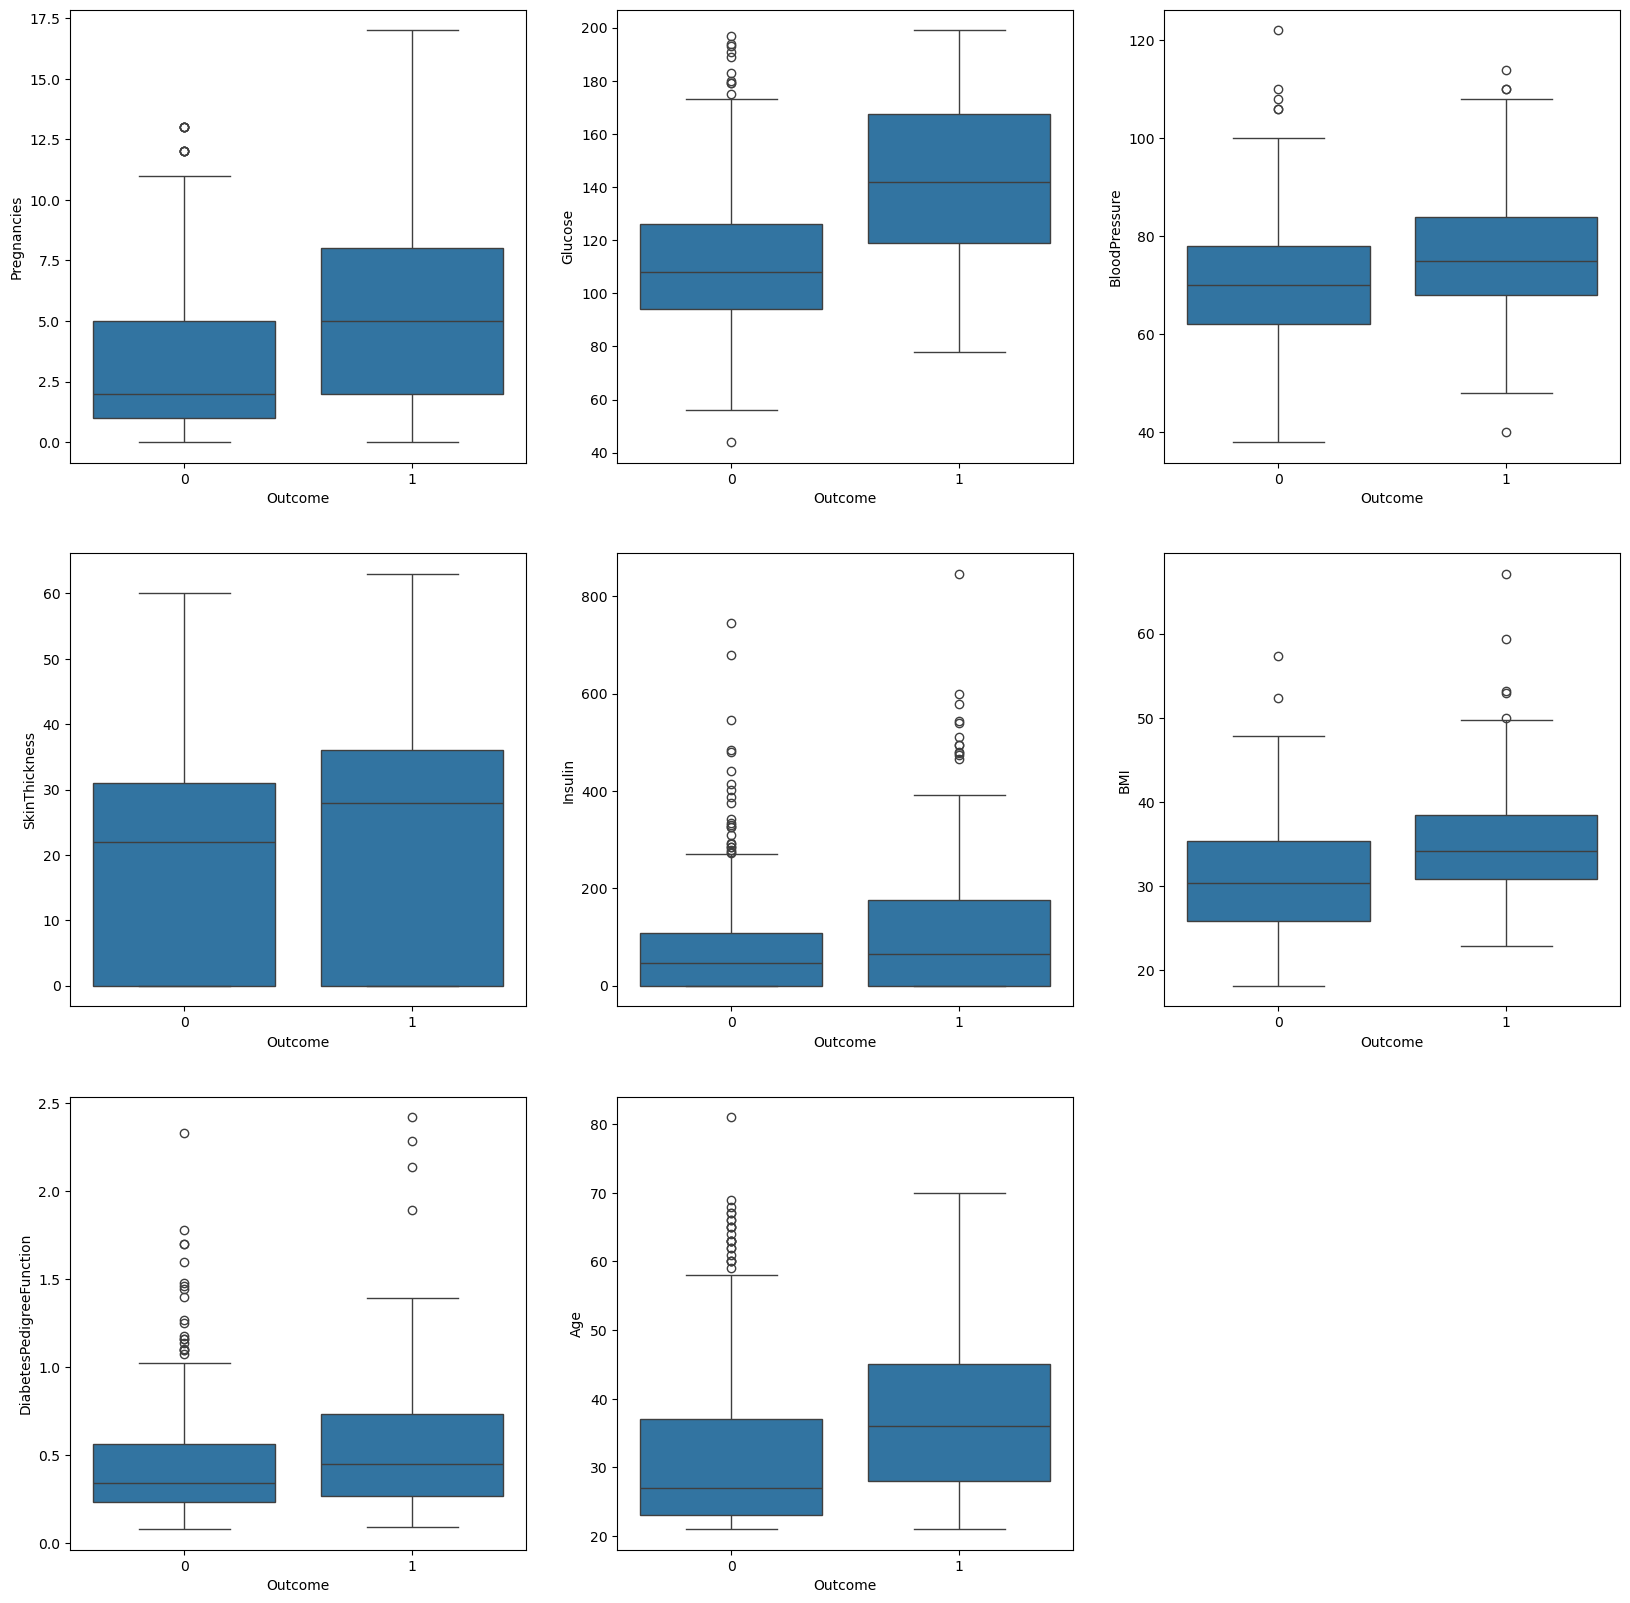

In [45]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

In [46]:
import plotly.express as px
plt.figure(figsize=(10,8))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

<Figure size 1000x800 with 0 Axes>

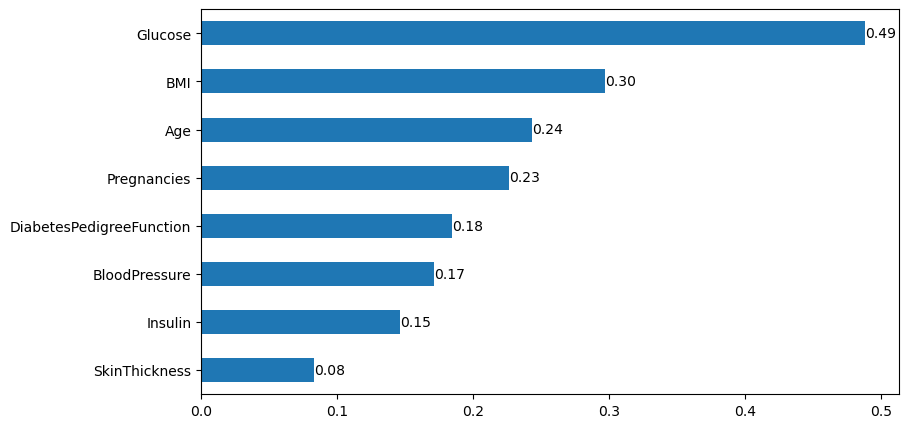

In [47]:
plt.figure(figsize=(9,5))
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

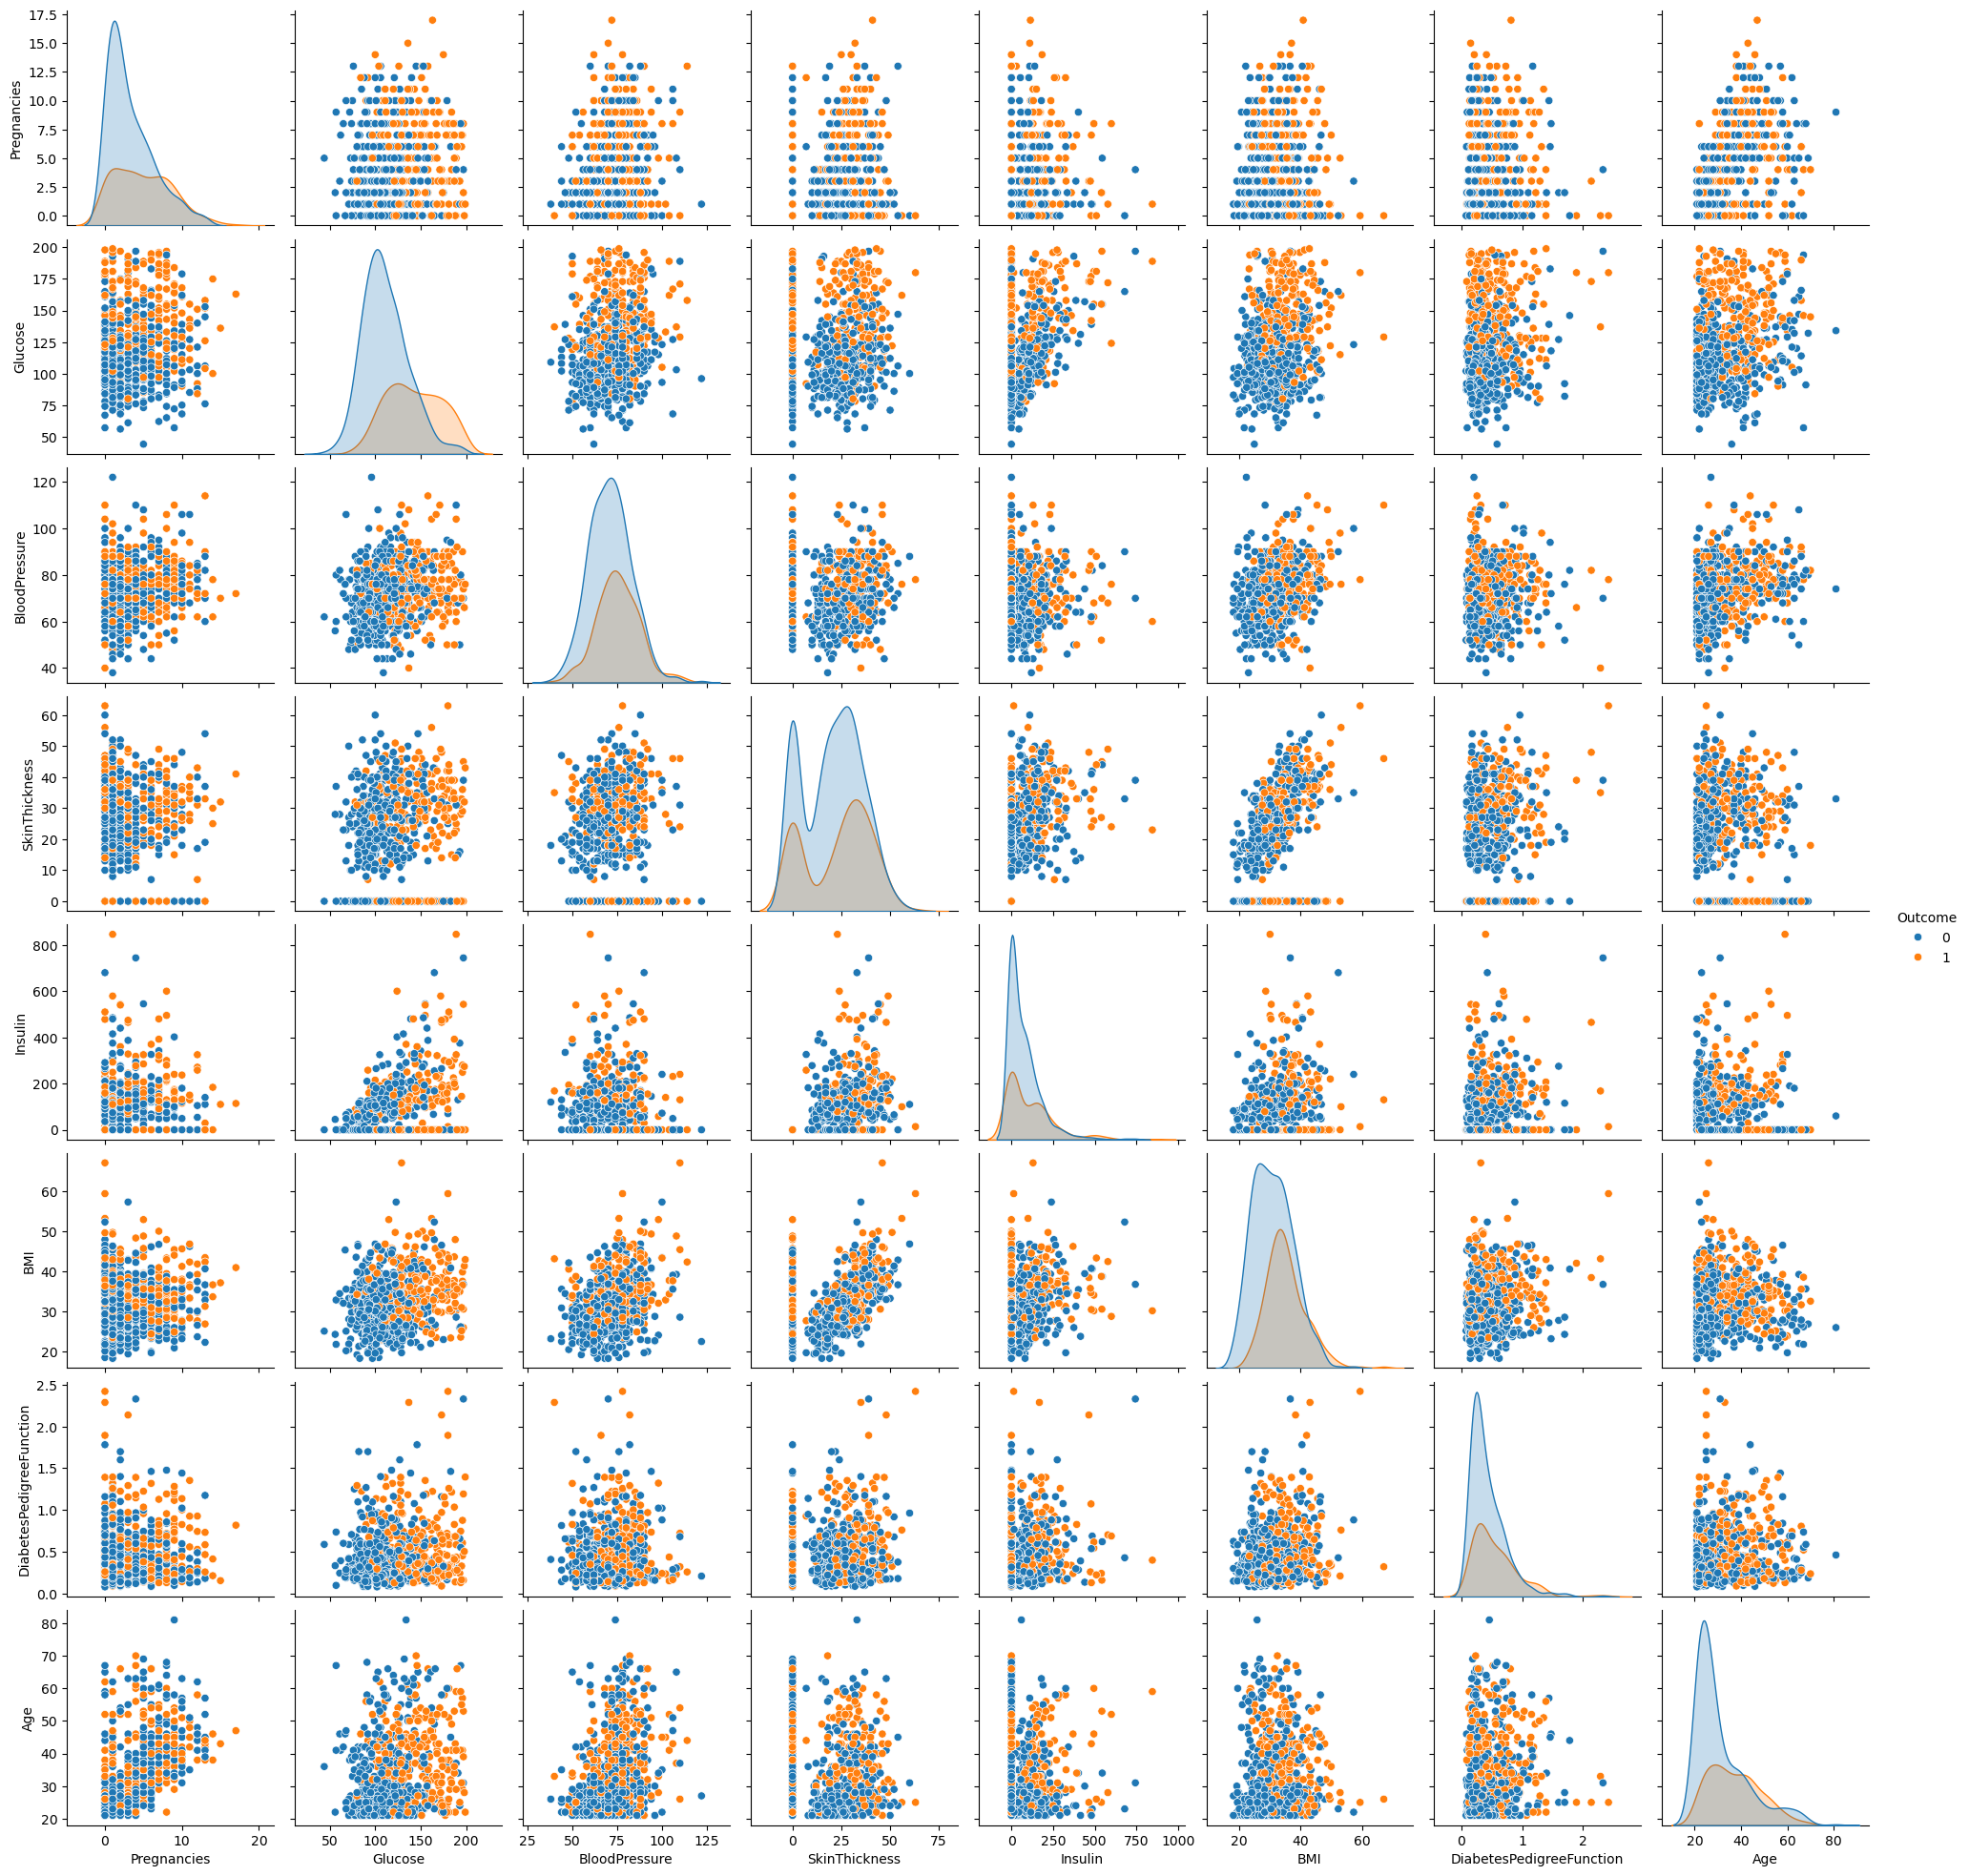

In [48]:
sns.pairplot(df, hue = "Outcome");

# Train | Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop('Outcome', axis =1)
y= df.Outcome

In [52]:
# without stratify_y
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.20, random_state=42)

print(y_train_.value_counts(normalize=True))
print()
print(y_test_.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.680556
1    0.319444
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, stratify= y, random_state=42 )

print(y_train_.value_counts(normalize=True))
print()
print(y_test_.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.680556
1    0.319444
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


# Modelling

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [56]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)
# pipelinemızı kuruyoruz.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [57]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [58]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.23367936, 0.76632064],
       [0.11960923, 0.88039077],
       [0.58160166, 0.41839834],
       [0.81462592, 0.18537408],
       [0.19181772, 0.80818228],
       [0.91051658, 0.08948342],
       [0.7639345 , 0.2360655 ],
       [0.13932957, 0.86067043],
       [0.97125901, 0.02874099],
       [0.88970007, 0.11029993],
       [0.71503222, 0.28496778],
       [0.75805504, 0.24194496],
       [0.82996045, 0.17003955],
       [0.81260234, 0.18739766],
       [0.0974634 , 0.9025366 ],
       [0.98344478, 0.01655522],
       [0.84875214, 0.15124786],
       [0.30126046, 0.69873954],
       [0.62398487, 0.37601513],
       [0.92736542, 0.07263458],
       [0.54071098, 0.45928902],
       [0.97778171, 0.02221829],
       [0.22511415, 0.77488585],
       [0.88700925, 0.11299075],
       [0.76148606, 0.23851394],
       [0.69324508, 0.30675492],
       [0.89994734, 0.10005266],
       [0.57209896, 0.42790104],
       [0.73984559, 0.26015441],
       [0.8399177 , 0.1600823 ],
       [0.

In [59]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # 1 sınıfına ait olma olasılıkları
test_data.sample(10)
# test datamıza pred ve pred_proba featurlarını ilave ederek
# modelin prediction işlemini nasıl yaptığını tekrar gözlemliyoruz.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
205            5      111             72             28        0  23.9   
327           10      179             70              0        0  35.1   
741            3      102             44             20       94  30.8   
585            1       93             56             11        0  22.5   
567            6       92             62             32      126  32.0   
561            0      198             66             32      274  41.3   
737            8       65             72             23        0  32.0   
102            0      125             96              0        0  22.5   
702            1      168             88             29        0  35.0   
434            1       90             68              8        0  24.5   

     DiabetesPedigreeFunction  Age  Outcome  pred  pred_proba  
205                     0.407   27        0     0    0.131152  
327                     0.200   37        0     1    0.902537  
741                     0.400   26        0     0    0.160082  
585                     0.417   22        0     0    0.043988  
567                     0.085   46        0     0    0.128715  
561                     0.502   28        1     1    0.880391  
737                     0.600   42        0     0    0.109574  
102                     0.262   21        0     0    0.063143  
702                     0.905   52        1     1    0.752699  
434                     1.138   36        0     0    0.084325

## Model Performance on Classification Tasks

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


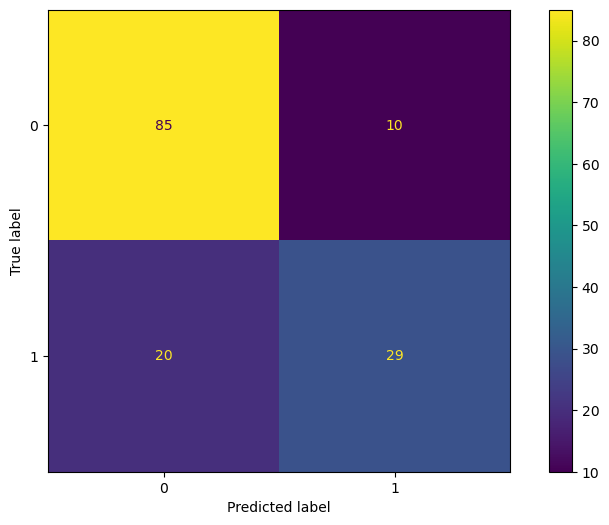

In [62]:
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test);

In [63]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [64]:
eval_metric(pipe_model,X_train,y_train,X_test,y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [66]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [67]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
cv = StratifiedKFold(n_splits=10) # her iterasyonda train ve test setlerinin birbirlerine olan oranlarına göre tüm
                                  # iterasyonlarda ayrışım yapar.
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], # 1 sınıfının scorelarını max. eder.
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1   0.004290    0.000000        0.600000         0.718310     0.450000   
2   0.000000    0.012559        0.642857         0.744526     0.450000   
3   0.005002    0.007015        0.923077         0.717557     0.600000   
4   0.003991    0.001126        0.857143         0.716418     0.600000   
5   0.015719    0.000000        0.705882         0.727941     0.600000   
6   0.000000    0.000000        0.647059         0.727941     0.550000   
7   0.000000    0.015625        0.714286         0.723881     0.526316   
8   0.000000    0.020340        0.647059         0.719424     0.578947   
9   0.005104    0.007231        0.750000         0.698529     0.600000   
10  0.010113    0.006500        0.625000         0.729927     0.500000   

    train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1       0.573034  0.514286  0.637500       0.706897        0.776062  
2       0.573034  0.529412  0.647619       0.724138        0.785714  
3       0.528090  0.727273  0.608414       0.844828        0.766409  
4       0.539326  0.705882  0.615385       0.827586        0.768340  
5       0.556180  0.648649  0.630573       0.775862        0.776062  
6       0.556180  0.594595  0.630573       0.741379        0.776062  
7       0.541899  0.606061  0.619808       0.771930        0.770713  
8       0.558659  0.611111  0.628931       0.754386        0.772640  
9       0.533708  0.666667  0.605096       0.789474        0.761079  
10      0.561798  0.555556  0.634921       0.719298        0.778420

In [70]:
df_scores.mean()[2:]

test_precision     0.711236
train_precision    0.722445
test_recall        0.545526
train_recall       0.552191
test_f1            0.615949
train_f1           0.625882
test_accuracy      0.765578
train_accuracy     0.773150
dtype: float64

## Cross Validate for 0 class

In [74]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)
scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

# make_score ile default olarak atanan Class 1  yerine diğer clasları almak için kullanılır.
# f1_score içinde geçen pos_label =0 parametresini make_scorer içinde kullanarak class değerini değiştirip diğer classlara da işlemler yapabiliriz.
# make_scorer'a eşitlediğimiz metricleri mutlaka bir dictionary içerisinde tanımlayıp bir değişkene (scoring) atıyoruz.
# make_scorer içinde post_label yok, scor_func. (f1, recall vs.) içinden geldi
#scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0},  şeklinde dict içinde verilir ve yukarıda merics key ler nasıl geçiyorsa aynısı yazılır

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
# scoring parametresine yukarda tanımladığımız scoring değişkenini vererek 0 classına ait metric scorlarını alabiliyoruz

fit_time  score_time  test_precision_0  train_precision_0  test_recall_0  \
1   0.003477    0.000000          0.744186           0.797872       0.842105   
2   0.007501    0.007482          0.750000           0.800525       0.868421   
3   0.006001    0.008586          0.822222           0.782946       0.973684   
4   0.001414    0.000000          0.818182           0.786458       0.947368   
5   0.004509    0.000000          0.804878           0.793194       0.868421   
6   0.005002    0.007008          0.780488           0.793194       0.842105   
7   0.005968    0.006717          0.790698           0.787013       0.894737   
8   0.005010    0.001834          0.800000           0.792105       0.842105   
9   0.015651    0.000000          0.804878           0.783290       0.891892   
10  0.015633    0.007817          0.756098           0.795812       0.837838   

    train_recall_0  test_f1_0  train_f1_0  
1         0.882353   0.790123    0.837989  
2         0.897059   0.804878    0.846047  
3         0.891176   0.891566    0.833563  
4         0.888235   0.878049    0.834254  
5         0.891176   0.835443    0.839335  
6         0.891176   0.810127    0.839335  
7         0.891176   0.839506    0.835862  
8         0.885294   0.820513    0.836111  
9         0.879765   0.846154    0.828729  
10        0.891496   0.794872    0.840941

In [76]:
df_scores.mean()[2:]

test_precision_0     0.787163
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.831123
train_f1_0           0.837217
dtype: float64

## GridSearchCV

[Logistic Regression Hyperparametreleri](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

[Threshold Optimization](https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7el)

## Precision Recall Curve

# Finding Best Thresholds

# Final Model and Model Deployment

## New Predictions for optimal_threshols

# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |